In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.learning_curve import validation_curve

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('../data/train.csv').sample(frac=0.1, replace=False)

In [ ]:
df = (df
      .assign(pickup_datetime=lambda x: pd.to_datetime(x.pickup_datetime),
              dropoff_datetime=lambda x: pd.to_datetime(x.dropoff_datetime)))

(-74.03, -73.75)

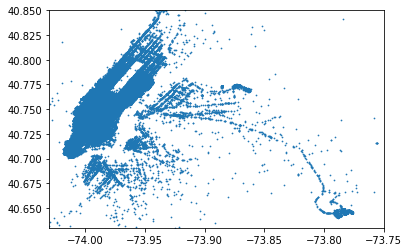

In [22]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.scatter(df.pickup_longitude, df.pickup_latitude, s = 0.5)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [23]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
311638,id0866704,1,2016-05-14 20:04:35,2016-05-14 20:19:30,2,-74.004234,40.720978,-73.993401,40.740780,N,895
255563,id3693023,1,2016-06-20 10:22:39,2016-06-20 10:41:57,1,-73.961159,40.780609,-73.978966,40.750462,N,1158
1010082,id2210405,1,2016-04-24 22:37:14,2016-04-24 22:42:06,1,-73.986565,40.730568,-73.979607,40.743542,N,292
884187,id1282479,1,2016-06-01 14:44:08,2016-06-01 14:51:25,2,-74.004860,40.710255,-73.996819,40.714760,N,437
915922,id3174843,2,2016-01-29 16:06:50,2016-01-29 16:27:30,1,-73.968948,40.754292,-73.985970,40.752541,N,1240
